# **DIABETES DATASET: FEATURE ENGINEERING AND CORRELATION**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, one-hot coding of categorical features is conducted to create a uniform dataset that consists only of binary features.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#Loading the dataset
df = pd.read_csv('diabetes_binary.csv')

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [64]:
#General dataset's desription
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [8]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [63]:
df.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Distribution of Binary Variables**

In [65]:
# List of binary columns to analyze
binary_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 
                  'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                  'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                  'NoDocbcCost', 'DiffWalk', 'Sex']

# Create a DataFrame to hold the counts
binary_counts = {}

# Loop through each binary column and get value counts
for column in binary_columns:
    binary_counts[column] = df[column].value_counts()

# Convert the dictionary to a DataFrame
binary_distribution = pd.DataFrame(binary_counts).T

# Rename the index for clarity
binary_distribution.columns = ['Count_0 (No)', 'Count_1 (Yes)']

# Display the distribution table
print(binary_distribution)

                      Count_0 (No)  Count_1 (Yes)
Diabetes_binary              35346          35346
HighBP                       30860          39832
HighChol                     33529          37163
CholCheck                     1749          68943
Smoker                       37094          33598
Stroke                       66297           4395
HeartDiseaseorAttack         60243          10449
PhysActivity                 20993          49699
Fruits                       27443          43249
Veggies                      14932          55760
HvyAlcoholConsump            67672           3020
AnyHealthcare                 3184          67508
NoDocbcCost                  64053           6639
DiffWalk                     52826          17866
Sex                          38386          32306


### **HighBMI**

In [67]:
# Descriptive statistics for BMI column
bmi_stats = df['BMI'].describe()
print(bmi_stats)

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


In [68]:
# One-hot Coding: Create the HighBMI column based on the BMI values
df['HighBMI'] = (df['BMI'] >= 25).astype(int)

# Check the first few rows to verify
print(df[['BMI', 'HighBMI']].head(20))

    BMI  HighBMI
0    26        1
1    26        1
2    26        1
3    28        1
4    29        1
5    18        0
6    26        1
7    31        1
8    32        1
9    27        1
10   24        0
11   21        0
12   27        1
13   58        1
14   29        1
15   18        0
16   30        1
17   30        1
18   20        0
19   26        1


In [70]:
# Distribution of values in percentages
print(df['HighBMI'].value_counts(normalize=True) * 100)

HighBMI
1    78.621343
0    21.378657
Name: proportion, dtype: float64


### **PoorGenHlth** 

In [17]:
# Distribution of values in percentages
print(df['GenHlth'].value_counts(normalize=True) * 100)

GenHlth
3    33.139535
2    28.110677
4    18.818254
1    11.715611
5     8.215923
Name: proportion, dtype: float64


In [69]:
# One-hot coding feature: Create a new binary column 'PoorGenHlth'
df['PoorGenHlth'] = df['GenHlth'].apply(lambda x: 1 if x == 5 else 0)

# Check the first few rows to confirm
print(df[['GenHlth', 'PoorGenHlth']].head(30))

    GenHlth  PoorGenHlth
0         3            0
1         3            0
2         1            0
3         3            0
4         2            0
5         2            0
6         1            0
7         4            0
8         3            0
9         3            0
10        3            0
11        1            0
12        2            0
13        3            0
14        1            0
15        3            0
16        2            0
17        1            0
18        2            0
19        3            0
20        1            0
21        5            1
22        2            0
23        1            0
24        3            0
25        2            0
26        2            0
27        4            0
28        2            0
29        2            0


In [21]:
# Distribution of values in percentages
print(df['PoorGenHlth'].value_counts(normalize=True) * 100)

PoorGenHlth
0    91.784077
1     8.215923
Name: proportion, dtype: float64


The share of positive responses for all binary categories by each healthcare group

### **PoorMentHlth**

In [71]:
# Calculate the distribution of 'MentHlth' values in percentages
menthlth_distribution = df['MentHlth'].value_counts(normalize=True) * 100

# Convert the index to a categorical type (if it's not already) and sort it
menthlth_distribution_sorted = menthlth_distribution.sort_index()

# Print the sorted distribution
print(menthlth_distribution_sorted)

MentHlth
0     68.028914
1      2.901318
2      4.621456
3      2.782493
4      1.387710
5      3.563345
6      0.407401
7      1.167034
8      0.280088
9      0.039608
10     2.721666
11     0.011317
12     0.183896
13     0.021219
14     0.499349
15     2.499576
16     0.039608
17     0.025463
18     0.059413
19     0.009902
20     1.591411
21     0.118825
22     0.031121
23     0.018390
24     0.014146
25     0.601200
26     0.024048
27     0.024048
28     0.140044
29     0.074973
30     6.111017
Name: proportion, dtype: float64


In [109]:
# Describe the 'MentHlth' column statistically
menthlth_stats = df['MentHlth'].describe()
print(menthlth_stats)

# Calculate the median of the 'MentHlth' column
median_menthlth = df['MentHlth'].median()
print(f"Median of MentHlth: {median_menthlth}")

count    70692.000000
mean         3.752037
std          8.155627
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MentHlth, dtype: float64
Median of MentHlth: 0.0


In [73]:
# Create the binary column 'PoorMentHlth'
df['PoorMentHlth'] = df['MentHlth'].apply(lambda x: 1 if x > 0 else 0)

# Check the first few rows to verify
print(df[['MentHlth', 'PoorMentHlth']].head(30))

    MentHlth  PoorMentHlth
0          5             1
1          0             0
2          0             0
3          0             0
4          0             0
5          7             1
6          0             0
7          0             0
8          0             0
9          0             0
10         0             0
11         0             0
12         0             0
13         3             1
14         0             0
15         0             0
16         0             0
17         0             0
18         0             0
19         0             0
20         0             0
21         0             0
22         0             0
23         0             0
24         4             1
25         2             1
26         0             0
27         0             0
28         2             1
29         0             0


In [74]:
# Check the distribution of the new column
print(df['PoorMentHlth'].value_counts())
poor_ment_health_dist = df['PoorMentHlth'].value_counts(normalize=True) * 100
print(poor_ment_health_dist)

PoorMentHlth
0    48091
1    22601
Name: count, dtype: int64
PoorMentHlth
0    68.028914
1    31.971086
Name: proportion, dtype: float64


### **PoorPhysHealth**

In [26]:
# Calculate the distribution of 'MentHlth' values in percentages
physhlth_distribution = df['PhysHlth'].value_counts(normalize=True) * 100

# Convert the index to a categorical type (if it's not already) and sort it
physhlth_distribution_sorted = physhlth_distribution.sort_index()

# Print the sorted distribution
print(physhlth_distribution_sorted)

PhysHlth
0     56.463249
1      4.035817
2      5.802637
3      3.448764
4      1.946472
5      3.298817
6      0.632320
7      1.875743
8      0.390426
9      0.077802
10     2.800883
11     0.031121
12     0.289990
13     0.036779
14     1.134499
15     2.706105
16     0.070729
17     0.049511
18     0.070729
19     0.014146
20     1.827647
21     0.323940
22     0.043852
23     0.038194
24     0.033950
25     0.787925
26     0.036779
27     0.048096
28     0.298478
29     0.134386
30    11.250212
Name: proportion, dtype: float64


In [111]:
# Describe the 'PhysHlth' column statistically
physhlth_stats = df['PhysHlth'].describe()
print(physhlth_stats)

# Calculate the median of the 'PhysHlth' column
median_menthlth = df['PhysHlth'].median()
print(f"Median of PhysHlth: {median_menthlth}")

count    70692.000000
mean         5.810417
std         10.062261
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: PhysHlth, dtype: float64
Median of PhysHlth: 0.0


In [75]:
# Create the binary column 'PoorPhysHlth'
df['PoorPhysHlth'] = df['PhysHlth'].apply(lambda x: 1 if x > 0 else 0)

# Check the first few rows to verify
print(df[['PhysHlth', 'PoorPhysHlth']].head(30))

    PhysHlth  PoorPhysHlth
0         30             1
1          0             0
2         10             1
3          3             1
4          0             0
5          0             0
6          0             0
7          0             0
8          0             0
9          6             1
10         4             1
11         0             0
12         0             0
13         3             1
14         0             0
15         0             0
16         0             0
17         0             0
18         0             0
19        15             1
20         0             0
21        30             1
22         0             0
23         0             0
24        30             1
25         1             1
26         3             1
27         4             1
28         2             1
29         0             0


In [76]:
# Check the distribution of the new column
print(df['PoorPhysHlth'].value_counts())
poor_phys_health_dist = df['PoorPhysHlth'].value_counts(normalize=True) * 100
print(poor_phys_health_dist)

PoorPhysHlth
0    39915
1    30777
Name: count, dtype: int64
PoorPhysHlth
0    56.463249
1    43.536751
Name: proportion, dtype: float64


### **HighAge**

In [140]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the share of 'yes' (1) for Diabetes_binary in each age group
diabetes_shares = df.groupby('Age_Groups')['Diabetes_binary'].mean() * 100

# Sort by ascending order of age groups
diabetes_shares = diabetes_shares.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                           '45-49', '50-54', '55-59', '60-64', '65-69', 
                                           '70-74', '75-79', '80-99', 'Don’t know / Refused / Missing'])

# Display the shares of 'yes' (1) in percentages
print(diabetes_shares)

Age_Groups
18-24                              7.967314
25-29                             10.028653
30-34                             15.324549
35-39                             22.413176
40-44                             29.857955
45-49                             37.478485
50-54                             44.935972
55-59                             49.552482
60-64                             56.695016
65-69                             60.408990
70-74                             63.910990
75-79                             63.088617
80-99                             59.141172
Don’t know / Refused / Missing          NaN
Name: Diabetes_binary, dtype: float64


In [79]:
# Create the 'HighAge' column based on age group mapping
df['HighAge'] = df['Age'].apply(lambda x: 1 if x >= 9 else 0)  # Age groups 9 and above are 60 years and older

# Check the new column
print(df[['Age', 'HighAge']].head(30))

    Age  HighAge
0     4        0
1    12        1
2    13        1
3    11        1
4     8        0
5     1        0
6    13        1
7     6        0
8     3        0
9     6        0
10   12        1
11    4        0
12    7        0
13   10        1
14   10        1
15   10        1
16    9        1
17   10        1
18    8        0
19    7        0
20    6        0
21   10        1
22    8        0
23    9        1
24   10        1
25    8        0
26   12        1
27    9        1
28    6        0
29    7        0


In [80]:
# Calculate the distribution by count
age_distribution_count = df['HighAge'].value_counts()

# Calculate the distribution by shares (percentage)
age_distribution_share = df['HighAge'].value_counts(normalize=True) * 100

# Display the results
print("Distribution by Count:")
print(age_distribution_count)

print("\nDistribution by Shares (%):")
print(age_distribution_share)

Distribution by Count:
HighAge
1    39832
0    30860
Name: count, dtype: int64

Distribution by Shares (%):
HighAge
1    56.345838
0    43.654162
Name: proportion, dtype: float64


### **High_School_Education & College_Education**

In [81]:
# Define the mapping for Higher Education based on Education categories
higher_education_mapping = {
    1: 'No',  # Didn't graduate high school
    2: 'No',  # Didn't graduate high school
    3: 'No',  # Didn't graduate high school
    4: 'Yes', # Graduated high school
    5: 'Yes', # Attended college or technical school
    6: 'Yes'  # Graduated college or technical school
}

# Map the Education column to Higher Education binary values
df['High_School_Education'] = df['Education'].map(higher_education_mapping)

# Convert to binary: 'Yes' to 1 and 'No' to 0
df['High_School_Education'] = df['High_School_Education'].map({'Yes': 1, 'No': 0})
# Display the first 10 rows to check the new column
print(df[['Education', 'High_School_Education']].head(10))

   Education  High_School_Education
0          6                      1
1          6                      1
2          6                      1
3          6                      1
4          5                      1
5          4                      1
6          5                      1
7          4                      1
8          6                      1
9          4                      1


In [82]:
# Create the 'College_education' column
df['College_Education'] = df['Education'].apply(lambda x: 1 if x >= 6 else 0)  # 6 and above means graduated college or technical school

# Display the first 10 rows of the DataFrame
print(df[['Education', 'College_Education']].head(10))

   Education  College_Education
0          6                  1
1          6                  1
2          6                  1
3          6                  1
4          5                  0
5          4                  0
6          5                  0
7          4                  0
8          6                  1
9          4                  0


In [52]:
# Display the distribution of the new columns
high_school_distribution = df['High_School_Education'].value_counts(normalize=True) * 100
college_distribution = df['College_Education'].value_counts(normalize=True) * 100

print("\nHigh School Education Distribution:\n", high_school_distribution)
print("\nCollege Education Distribution:\n", college_distribution)


High School Education Distribution:
 High_School_Education
1    92.687999
0     7.312001
Name: proportion, dtype: float64

College Education Distribution:
 College_Education
0    63.19244
1    36.80756
Name: proportion, dtype: float64


### **LowIncome**

In [99]:
# Define the mapping for Income categories to binary LowIncome
income_mapping = {
    1: 1,  # Income less than $15,000 (Low Income)
    2: 1,  # Income less than $15,000 (Low Income)
    3: 1,  # $15,000 ≤ Income < $25,000 (Low Income)
    4: 1,  # $15,000 ≤ Income < $25,000 (Low Income)
    5: 0,  # $25,000 ≤ Income < $35,000 (Not Low Income)
    6: 0,  # $35,000 to less than $50,000 (Not Low Income)
    7: 0,  # Income ≥ $50,000 (Not Low Income)
    8: 0,  # Income ≥ $50,000 (Not Low Income)
    9: None  # Don’t know / Not sure / Missing Respondents
}

# Map the 'Income' values to the new 'LowIncome' binary column
df['LowIncome'] = df['Income'].map(income_mapping)

# Convert the 'LowIncome' column to integers (0 and 1), replacing None with np.nan if needed
df['LowIncome'] = df['LowIncome'].astype('Int64')  # Use 'Int64' to allow for NaN

# Display the first 10 rows to check the new column
print(df[['Income', 'LowIncome']].head(10))

   Income  LowIncome
0       8          0
1       8          0
2       8          0
3       8          0
4       8          0
5       7          0
6       6          0
7       3          1
8       8          0
9       4          1


In [92]:
# Saving newly created features to a new csv file
df.to_csv('diabetes_binary_processed.csv', index=False)

In [102]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'HighBMI', 'PoorGenHlth', 'PoorMentHlth', 'PoorPhysHlth', 'HighAge',
       'High_School_Education', 'College_Education', 'LowIncome'],
      dtype='object')


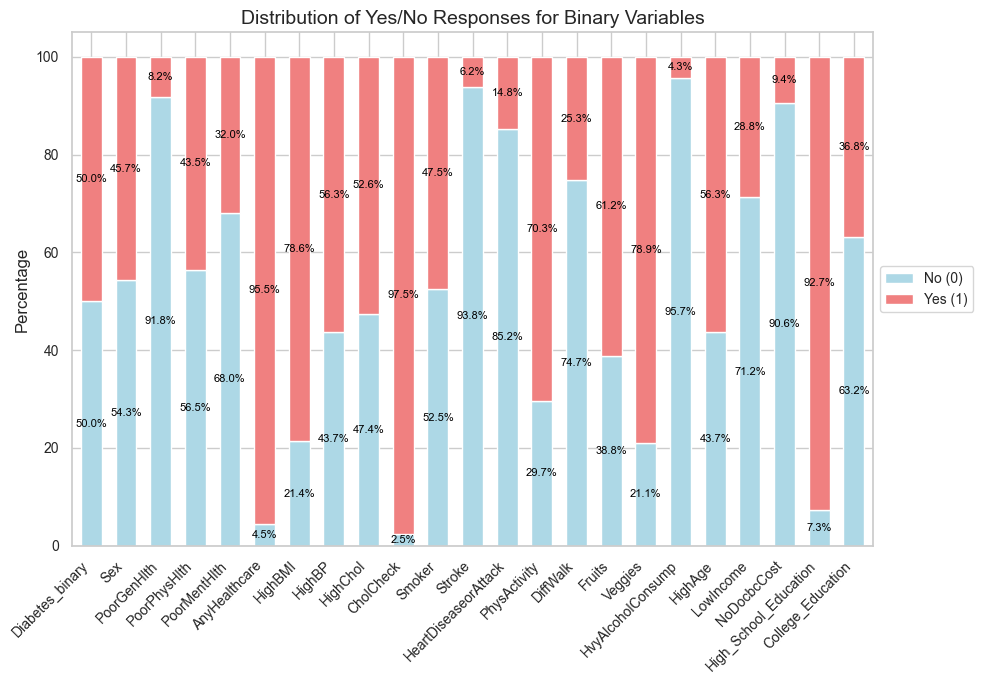

In [100]:
# Correct list of binary columns
binary_columns = [ 
    'Diabetes_binary', 'Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 'AnyHealthcare', 'HighBMI', 'HighBP', 'HighChol', 
    'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'HighAge', 'LowIncome', 'NoDocbcCost', 'High_School_Education', 'College_Education'  # Corrected column names
]

# Create a DataFrame to store percentages for plotting
binary_percentages = pd.DataFrame()

# Calculate percentages for each binary column
for col in binary_columns:
    counts = df[col].value_counts(normalize=True) * 100  # Get percentages
    binary_percentages[col] = counts

# Transpose the DataFrame to make the columns the index (for easier plotting)
binary_percentages = binary_percentages.T

# Plot stacked bar chart
ax = binary_percentages.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'lightcoral'], width=0.6)

# Add labels inside the bars with smaller font
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=8, color='black')

# Move the legend to the right
plt.legend(['No (0)', 'Yes (1)'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Add labels and title
plt.title('Distribution of Yes/No Responses for Binary Variables', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()